# Building a Basic Keras Neural Network Sequential Model

## Architecture of a neural network

Let's say we want to create a network that will recognise handwritten digits in images. It should take as input a 28x28 image (a total of 784 features) and output a 10x1 vector, where the digit predicted to be in the image is indicated by a value of 1 in the position in the vector of that digit. For example, if we input an image of a 2, we would expect an output vector of [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] - the 3rd position, indicating the '2' digit, has a 1 in it.

We want to add two hidden layers in order to introduce some non-linearity into our model. The architecture for this model looks as follows:

<img src="https://github.com/Explore-AI/Public-Data/blob/master/Neural%20Networks/ANN_arc.png?raw=true" width="600px">

Let's break this down:

- The input image is 28x28 pixels, for a total of 784 pixels. Hence the input layer has 784 neurons: one for each pixel value.

- The network has two hidden layers, each with 64 neurons, and each followed by ReLU-type activation functions.

- It has an output layer containing 10 neurons, followed by a softmax activation. This is where we will get the 10x1 vector.

- Finally, a loss is calculated from the output layer (this is usually not included in the final product).

The dataset used is MNIST, and the model built is a Sequential network of Dense layers, intentionally avoiding CNNs for now.

First are the imports and a few hyperparameter and data resizing variables.

In [61]:
# %pip install livelossplot
# %pip install tensorflow

In [59]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from matplotlib import pyplot as plt
from random import randint
import livelossplot

plot_losses = livelossplot.PlotLossesKeras()

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCHSIZE = 32
EPOCHS = 10

Next is a function for outputting some simple (but useful) metadata of our dataset. Since we will be using it a few times, it makes sense to put the few lines in a callable function. Reusable code is an end in and of itself :)

In [4]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

### Preparing our dataset

Next we load our dataset (MNIST, using Keras' dataset utilities), and then use the function above to get some dataset metadata.

In [5]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Makining a copy of the original data before flattening
X_train_flatten = X_train.copy()
X_test_flatten = X_test.copy()

# Check the data set
data_summary(X_train, y_train, X_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


#### A look at some random digits
It's a good idea to get a sense of the dataset we're working with. Runing this code multple times will result to see new randomly selected digits from the training set.

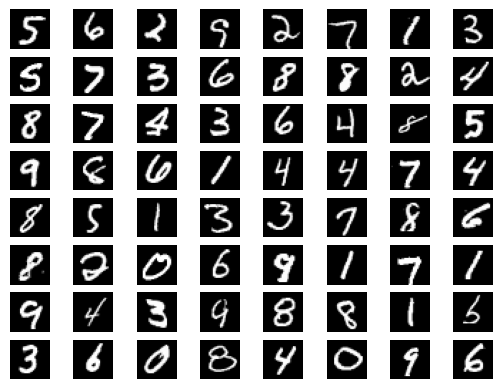

In [6]:
# Display the random images
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    ax.axis('off')
    sample = randint(0, X_train.shape[0])
    plt.imshow(X_train_flatten[sample], cmap='gray')

To prepare MNIST images for input into a neural network, they must be reshaped from their original two-dimensional format into a one-dimensional vector. Additionally, class labels are converted into a binary matrix representation using the to_categorical function. The following steps achieve this transformation, after which the previously defined function is called again to illustrate the impact of reshaping on the dataset.

In [7]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], NUM_ROWS * NUM_COLS) # 60000, 784
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], NUM_ROWS * NUM_COLS) # 10000, 784
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

#### Check state of the dataset

In [8]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Building a Model**
### **Model Architecture:**

We are constructing a simple feedforward neural network using Keras' `Sequential` model. The network consists of three fully connected layers, or **Dense** layers, which are common for neural network classifiers. Additionally, we include **Dropout** layers to help prevent overfitting and improve the generalization of the model.

#### **Model Layers:**

1. **First Layer:**
   - **Dense (512 neurons, ReLU activation)**: This layer contains 512 neurons and uses the **ReLU** (Rectified Linear Unit) activation function, which is highly efficient for training deep networks by introducing non-linearity.
   - **Dropout (0.5)**: A dropout rate of 50% is applied after this layer. This means that during training, 50% of the neurons in this layer are randomly set to zero at each update, helping to prevent overfitting by ensuring the model doesn't become overly reliant on specific neurons.

2. **Second Layer:**
   - **Dense (256 neurons, ReLU activation)**: The second fully connected layer has 256 neurons and uses the **ReLU** activation function.
   - **Dropout (0.25)**: A dropout rate of 25% is applied to the second layer. This allows some regularization while still maintaining sufficient capacity in the network to capture relevant patterns in the data.

3. **Output Layer:**
   - **Dense (NUM_CLASSES neurons, Softmax activation)**: The output layer has one neuron per class (defined by `NUM_CLASSES`) and uses the **Softmax** activation function. This function converts the output to probabilities, which is ideal for multiclass classification problems, where the output can be interpreted as a distribution over all possible classes.

#### **Input Shape:**
The input to the model consists of images that are flattened into a one-dimensional vector. The input shape is specified as `input_shape=(NUM_ROWS * NUM_COLS,)` in the first layer to match the flattened image size.

---

### **Why Use Dropout?**

- **Prevent Overfitting**: Dropout helps to prevent overfitting by randomly setting a fraction of the input units to zero at each update during training. This forces the model to learn more robust features and ensures that it doesn’t become overly reliant on specific neurons.
- **Improved Generalization**: By preventing neurons from co-adapting too much, dropout makes the network more generalizable to unseen data.
  
The **Dropout** technique is applied after the first and second layers, with different rates:
- **After the first layer**: A dropout rate of 50% ensures that half of the neurons in this layer are randomly dropped during training, promoting diversity in learning.
- **After the second layer**: A dropout rate of 25% is applied, striking a balance between regularization and the ability to capture complex patterns.

In [9]:
# Build a model
model = Sequential([
    Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)),
    Dropout(0.5),  # Drop 50% of neurons in this layer
    Dense(256, activation='relu'),
    Dropout(0.25),  # Drop 25% of neurons in this layer
    Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compiling the model**:

Before we can begin training, we need to configure the training process. We decide on three key factors during the compilation step.

1. The **optimizer**: an algorithm which directly controls the rate and method by which weights are changed during training. `Keras` has a number of optimizer options; we'll stick with `Adam`, a common gradient-based method.
2. The **loss function**. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between `binary_crossentropy` (two classes) and categorical_crossentropy (>2 classes), so we’ll use the latter as we're trying to classify 10 different digits.
3. A list of **metrics**. Since this is a classification problem, we’ll just have `Keras` report on the accuracy metric. Remember, for a dataset with imbalanced classes, something like _F1-score_ is a better choice.

Here’s what that compilation looks like.

In [10]:
# Compile model
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

## **Training and evaluating the model:**

This code trains and evaluates the model we have created. It also uses `matplotlib` and the `history` object provided by Keras, to report on how the model behaves during training. Here, we are using the `history` object it to plot training and validation accuracy over time.

Training the model is as simple as calling the `.fit()` method and specifying some hyperparameters. There are a lot of possible hyperparameters, but we’ll only manually supply a few:

- The training data (images and labels), commonly known as X and Y, respectively;
- The number of epochs (complete pass through the entair training data);
- The batch size (subset of the training data to used to perform one update to the model's weight); and
- validation data (images and labels), commonly known as X_val and Y_val, respectively;

Here’s what that looks like.

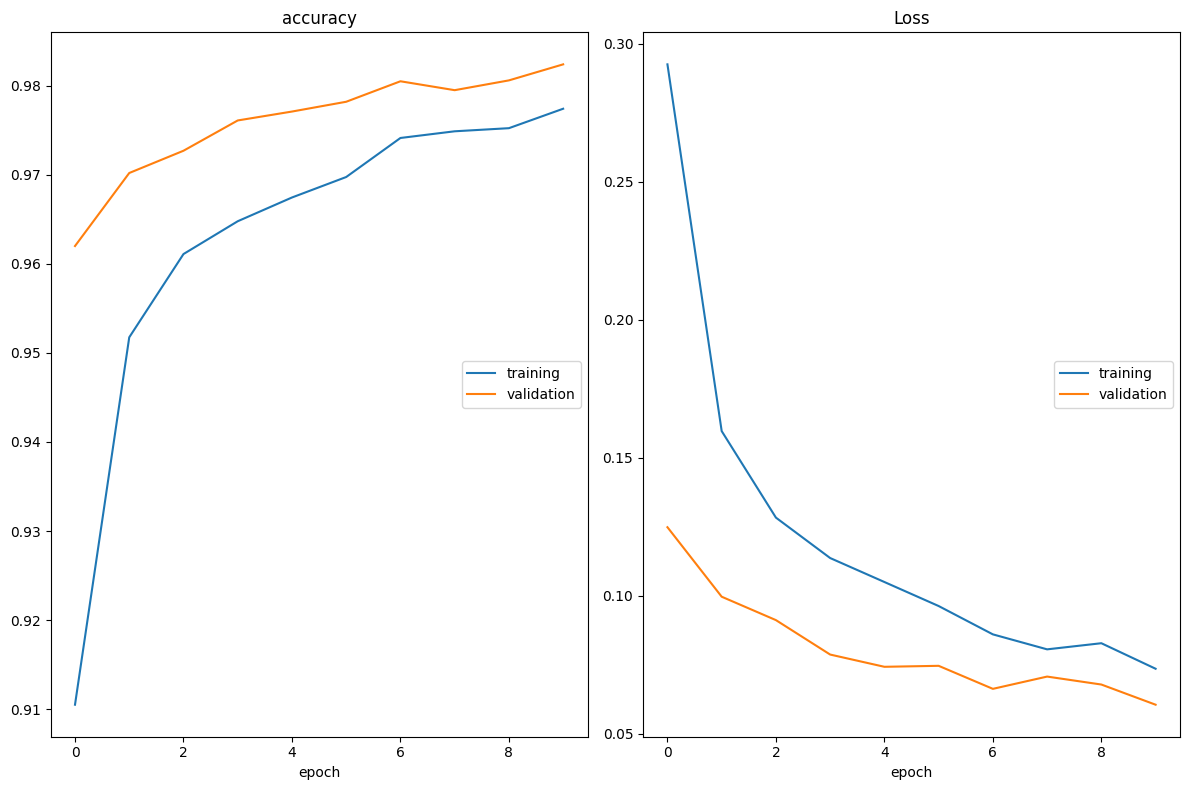

accuracy
	training         	 (min:    0.910, max:    0.977, cur:    0.977)
	validation       	 (min:    0.962, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.073, max:    0.293, cur:    0.073)
	validation       	 (min:    0.060, max:    0.125, cur:    0.060)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9774 - loss: 0.0745 - val_accuracy: 0.9824 - val_loss: 0.0604
Test loss: 0.0604
Test accuracy: 0.982


In [11]:
# Training the model
model.fit(
    X_train, y_train,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    callbacks=[plot_losses],
    verbose=1,
    validation_data=(X_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

The only unorthodox (as far as using the Keras library standalone) step has been the use of the Live Loss Plot callback which outputs epoch-by-epoch loss functions and accuracies at the end of each epoch of training. Make sure you have installed Live Loss Plot prior to running the above code. We are also given the final loss and accuracy on our test dataset.

## Making predictions¶

We now want to use our model to make a prediction on a given image. Can our model accurately determine the handwritten number depicted?

Run the code below a few times. It will show the image we are trying to predict, as well as the probability distribution that the model outputs. You'll start to get a sense of what the model is seeing as you cycle through some examples.

In [39]:
# Function to display image and prediction
def predict_random_image(dataset: str, model, test_set, flatten, num_rows, num_cols):
    # Select an image at random to spped up our testing
    sample = np.random.randint(len(test_set))

    prediction = model.predict(test_set[[sample]])[0]

    # Plot the image and the output distribution
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))

    # Plot the image
    ax[0].imshow(flatten[sample], cmap='Greys')
    ax[0].axis('off')
    ax[0].set_adjustable('box')
    ax[0].set_facecolor('black')
    ax[0].set_frame_on(False)
    ax[0].set_xticks(()), ax[0].set_yticks(())
    ax[0].set_title('Random Image')

    # Plot the prediction
    ax[1].bar(np.arange(10), prediction)
    ax[1].set_xticks(np.arange(10))
    ax[1].set_title('Out put probability distribution')
    ax[1].set_xlabel('Number')
    ax[1].set_ylabel('Probability')
    plt.tight_layout()
    plt.show()

    print(f"The higher probabilities of prediction on {dataset} dataset is: {prediction.argmax()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


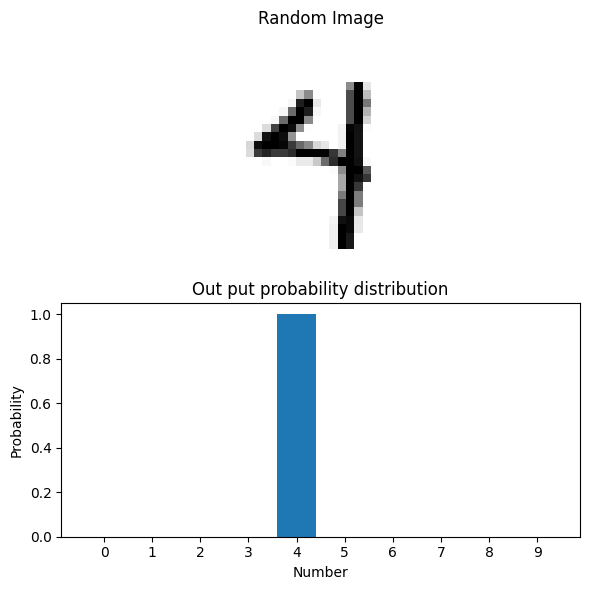

The higher probabilities of prediction on Test dataset is: 4


In [41]:
# Predict on the train or test dataset
predict_random_image("Test", model, X_test, X_test_flatten, NUM_ROWS, NUM_COLS)

Almost done, but first let's output a summary of the neural network we built.

In [42]:
# Summary of neural network
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

And finally, visulaize the model:

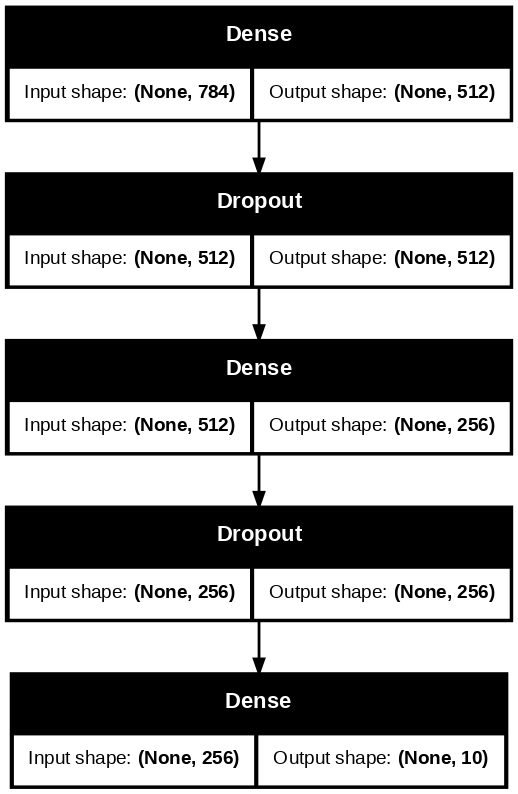

In [57]:
# Save the model plot with reduced size
plot_model(model, to_file="model_plot.png", show_shapes=True, dpi=100)

## Conclusion

In this train we have seen or been introduced to:

- The fundamental ingredients of a neural network, including layers, neurons, weights, activation functions;
- The famous MNIST dataset for image recognition tasks;
- The construction of a neural network for image classification using `keras`;
- The virtue of keeping a validation set to guide model training.